## 构建神经网络/深度学习模型的基本步骤

- 数据处理：从本地或URL读取数据，并完成预处理操作（如数据校验、格式转化等），保证模型可读取。
- 模型设计：网络结构设计，相当于模型的假设空间，即模型能够表达的关系集合。
- 训练配置：设定模型采用的寻解算法，即优化器，并指定计算资源。
- 训练过程：循环调用训练过程，每轮都包括前向计算、损失函数（优化目标）和反向传播三个步骤。
- 模型保存：将训练好的模型保存，模型预测时调用。

### 数据处理

- 数据处理包含五个部分：数据导入、数据形状变换、数据集划分、数据归一化处理和封装`load data`函数。
- 数据预处理后，才能被模型调用

In [1]:
import numpy as np
import json

"""数据导入"""

data = np.fromfile(r'../datasets/housing.data', sep=' ')
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [2]:
"""数据形状变换

导入的原始数据是1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推...
把数据形状转换成 N * 14 的二维矩阵
"""

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

data.shape

(506, 14)

In [3]:
"""数据集划分

将数据集划分为训练集和测试集，训练集用于确定模型的参数，测试集用于评判模型的效果
"""

ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]

training_data.shape

(404, 14)

In [4]:
"""数据归一化处理

对每个特征进行归一化处理，使得每个特征的取值缩放到0-1之间
归一化的好处：模型训练更高效；特征前的权重大小可以代表该变量对预测结果的贡献度。
"""

# 计算训练数据集的最大值、最小值和平均值
maximums = training_data.max(axis=0)
minimums = training_data.min(axis=0)
avgs = training_data.sum(axis=0) / training_data.shape[0]

# 对数据进行归一化处理
for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    
data[0]

array([0.        , 0.18      , 0.07344184, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.22755741,
       0.28723404, 1.        , 0.08967991, 0.42222222])

In [5]:
"""封装成load_data函数"""

def load_data():
    # 从文件导入数据
    data = np.fromfile(r'../datasets/housing.data', sep=' ')
    
    # 数据形状变换
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    feature_num = len(feature_names)
    data = data.reshape([data.shape[0] // feature_num, feature_num])
    
    # 数据集划分
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]
    
    # 归一化处理
    maximums = training_data.max(axis=0)
    minimums = training_data.min(axis=0)
    avgs = training_data.sum(axis=0) / training_data.shape[0]
    
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
        
    # 返回训练集和测试集
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [6]:
# 获取数据
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

print(x[0])
print(y[0])

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]
[0.42222222]


## 模型设计

In [8]:
"""模型设计

将预测结果输出的过程以“类和对象”的方式来描述，类成员变量有参数w和b
通过写一个forward函数（代表前向计算），完成从特征和参数到输出预测值的计算过程

机器学习模型普遍被深度学习模型代替的原因：
由于深度学习网络强大的表示能力，很多传统机器学习模型的学习能力等同于相对简单的深度学习模型
"""

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

## 训练配置

In [9]:
"""训练配置

模型设计完成后，需要通过训练配置寻找模型的最优解，即通过损失函数来衡量模型的好坏。
"""

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        err = z - y
        cost = err * err
        cost = np.mean(cost)
        return cost

## 训练过程

In [12]:
"""训练过程

训练过程的目标是让定义的损失函数尽可能的小，也就是找到一个参数解w和b，使得损失函数取得极小值。
"""

# 使用梯度下降法求解
net = Network(13)
losses = []

# 画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1.0)
w9 = np.arange(-160.0, 160.0, 1.0)
losses = np.zeros([len(w5), len(w9)])

# 计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

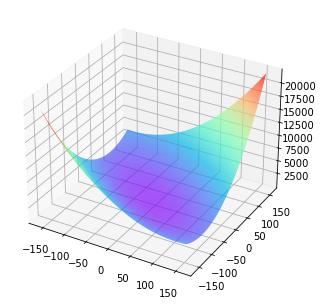

In [13]:
# 使用matplotlib将两个变量和对应的Loss做3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [21]:
# 封装Train函数
# 实现逻辑：前向计算输出 -> 根据输出和真实值计算Loss -> 基于Loss和输入计算梯度 -> 根据梯度更新参数值
# 以上四个部分反复执行，直到损失函数最小

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        err = z - y
        num_samples = err.shape[0]
        cost = err * err
        cost = np.sum(cost) / num_samples
        return cost
    
    # 梯度计算
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = z - y
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b
    
    # 梯度更新
    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        
    # 模型训练
    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i+1) % 10 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses

In [22]:
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]

# 创建网络
net = Network(13)
num_iterations = 1000

# 启动训练
losses = net.train(x, y, iterations=num_iterations, eta=0.01)

iter 9, loss 5.143394325795511
iter 19, loss 3.0979241942259876
iter 29, loss 2.082241020617026
iter 39, loss 1.5673801618157397
iter 49, loss 1.296620473507743
iter 59, loss 1.1453399043319763
iter 69, loss 1.05301557174352
iter 79, loss 0.9902292156463154
iter 89, loss 0.9426576903842504
iter 99, loss 0.9033048096880774
iter 109, loss 0.868732003041364
iter 119, loss 0.837229250968144
iter 129, loss 0.807927474161227
iter 139, loss 0.7803677341465795
iter 149, loss 0.7542920908532763
iter 159, loss 0.7295420168915829
iter 169, loss 0.7060090054240882
iter 179, loss 0.6836105084697766
iter 189, loss 0.6622781710179412
iter 199, loss 0.6419520361168637
iter 209, loss 0.6225776517869489
iter 219, loss 0.6041045903195836
iter 229, loss 0.5864856570315077
iter 239, loss 0.5696764374763879
iter 249, loss 0.5536350125932015
iter 259, loss 0.5383217588525027
iter 269, loss 0.5236991929680567
iter 279, loss 0.5097318413761649
iter 289, loss 0.4963861247069634
iter 299, loss 0.4836302523439023

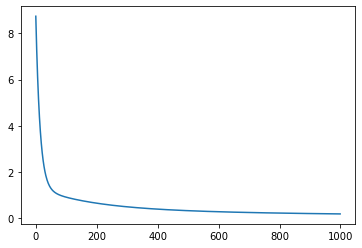

In [23]:
# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

## 保存模型

In [27]:
np.save(r'../models/housing_w.npy', net.w)
np.save(r'../models/housing_b.npy', net.b)

In [28]:
np.load(r'../models/housing_w.npy')

array([[ 1.62825109],
       [ 0.64641383],
       [ 0.0076228 ],
       [ 1.05908662],
       [ 0.93176398],
       [-0.79092871],
       [-0.09001985],
       [ 0.1685224 ],
       [-0.62478141],
       [-0.26431991],
       [-0.13772096],
       [ 1.12927118],
       [ 0.01313858]])

In [30]:
np.load(r'../models/housing_b.npy')

array(-0.4003131)